 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [71]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [72]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
daily_returns_whole = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates = True)
daily_returns_whole.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [73]:
# Count nulls
daily_returns_whole.isnull().mean() * 100
daily_returns_whole.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [74]:
# Drop nulls
daily_returns_whole = daily_returns_whole.dropna()
daily_returns_whole.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [75]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
daily_return_algo = pd.read_csv(algo_returns_csv, index_col = "Date", infer_datetime_format=True, parse_dates = True)
daily_return_algo.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [76]:
# Count nulls
daily_return_algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [77]:
# Drop nulls
daily_return_algo = daily_return_algo.dropna()
daily_return_algo.isnull().sum()


Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [78]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col = "Date", infer_datetime_format=True, parse_dates = True)
sp500_history.tail(3)

,Close
Date,
2012-10-03,$1450.99
2012-10-02,$1445.75
2012-10-01,$1444.49


In [79]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [80]:
# Fix Data Types

sp500_history["Close"] = sp500_history["Close"].str.replace('$', '').astype('float')
sp500_history

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [81]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history.pct_change()
sp500_daily_returns

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [82]:
# Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna()
sp500_daily_returns.isnull().sum()
sp500_daily_returns.tail()

,Close
Date,
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123
2012-10-02,-0.003611
2012-10-01,-0.000872


In [83]:
# Rename Column
sp500_daily_returns.rename(columns = {"Close":"sp500"}, inplace = True )
sp500_daily_returns

/Users/fareedfreihat/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,sp500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [84]:
#daily_returns_whole

## Combine Whale, Algorithmic, and S&P 500 Returns

In [85]:
# Concatenate all DataFrames into a single DataFrame
df_daily = pd.concat([daily_returns_whole, daily_return_algo, sp500_daily_returns], axis = 'columns', join = 'inner')
df_daily


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

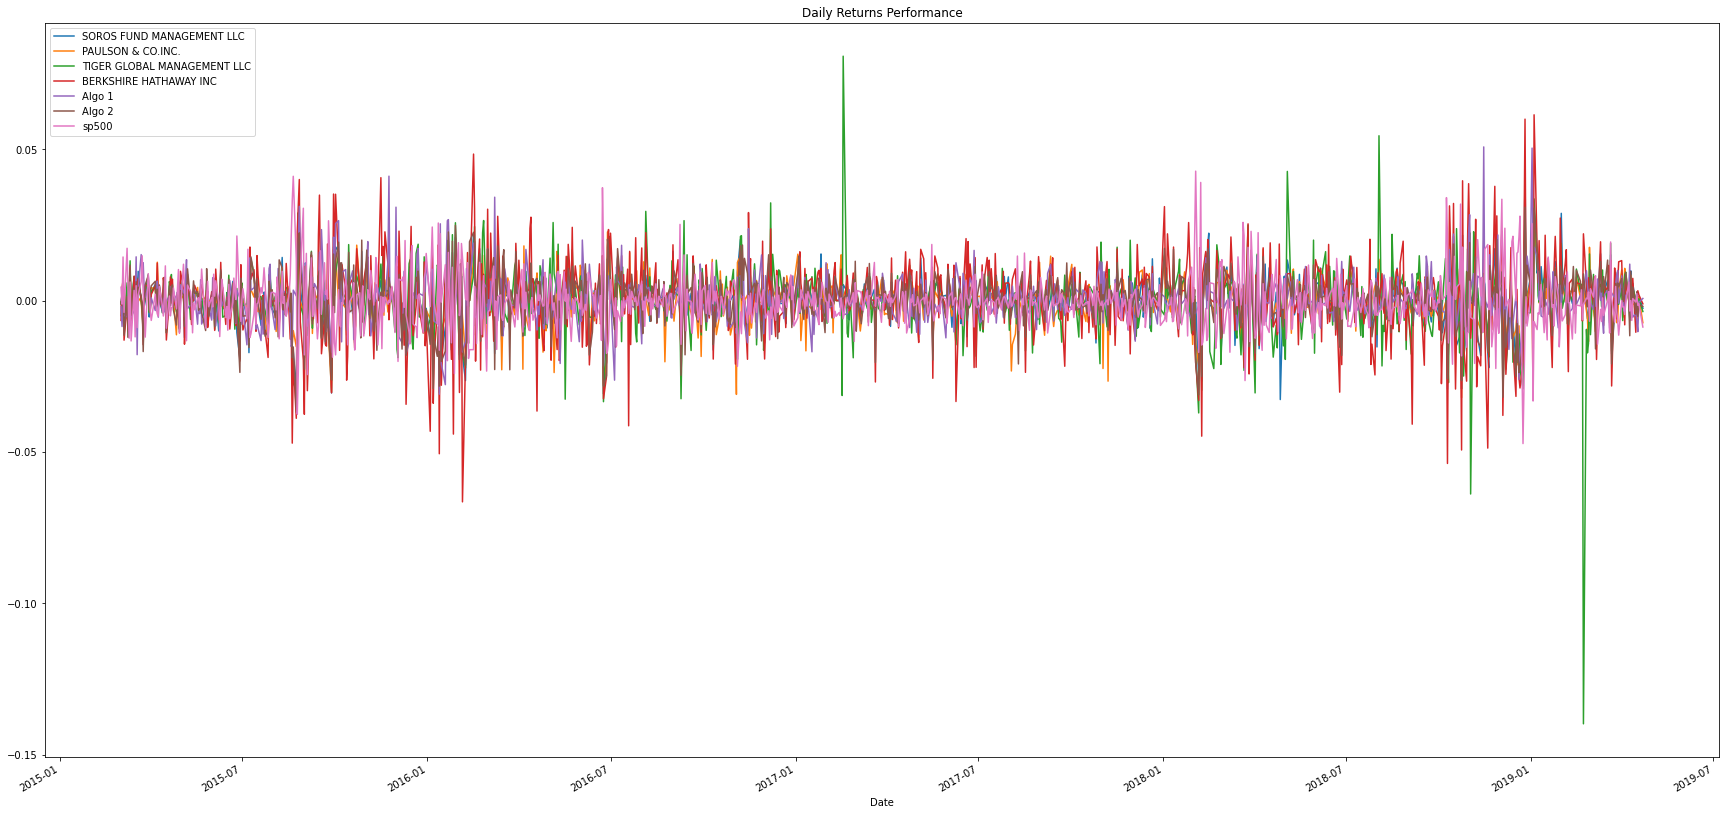

In [86]:
# Plot daily returns
df_daily.plot(figsize = (30,15), title = "Daily Returns Performance")

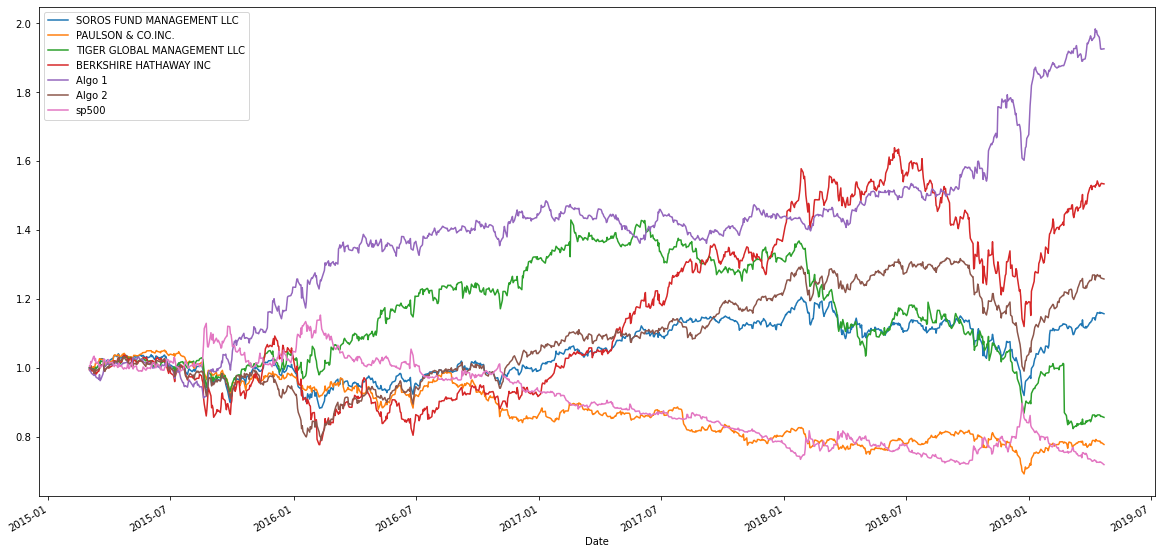

In [87]:
# Plot cumulative returns
df_cum = (1+ df_daily).cumprod()
df_cum.plot(figsize = (20,10),)

#Alog 1 return is leading, followed by BHI

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

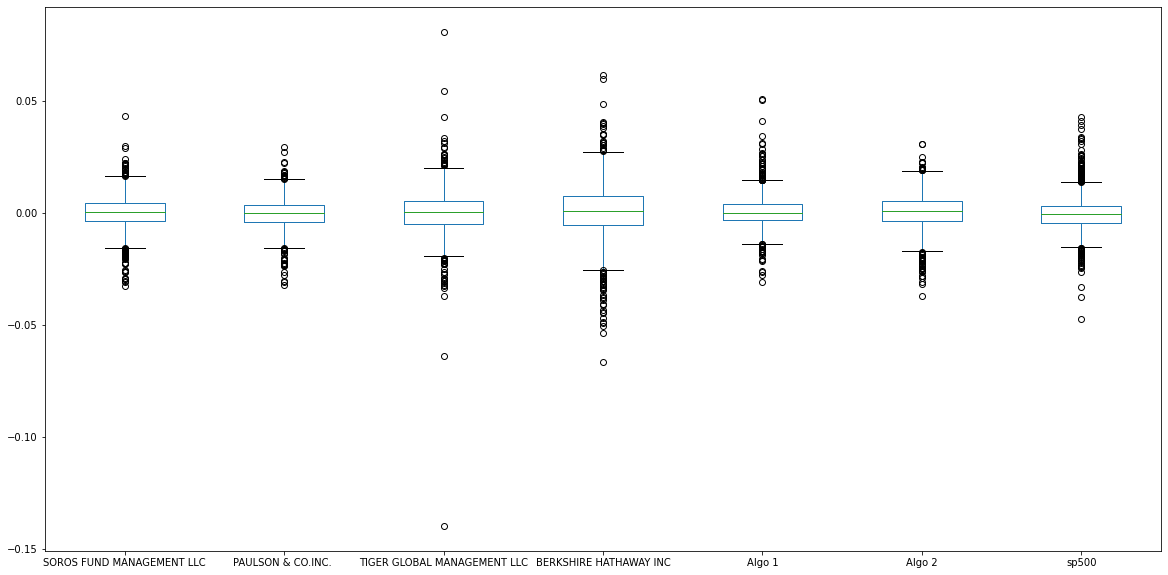

In [88]:
# Box plot to visually show risk
df_daily.plot(kind = "box", figsize = (20,10))

In [89]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
#df_daily_std = pd.DataFrame(df_daily.std())
df_daily.std()

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
sp500                          0.008587
dtype: float64

In [90]:
# Determine which portfolios are riskier than the S&P 500
sp500_std = df_daily['sp500'].std()
df_daily.std() > sp500_std

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
sp500                          False
dtype: bool

In [91]:
# Calculate the annualized standard deviation (252 trading days)
df_annualized_std = df_daily.std()*np.sqrt(252)
df_annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
sp500                          0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

In [92]:
df_daily

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


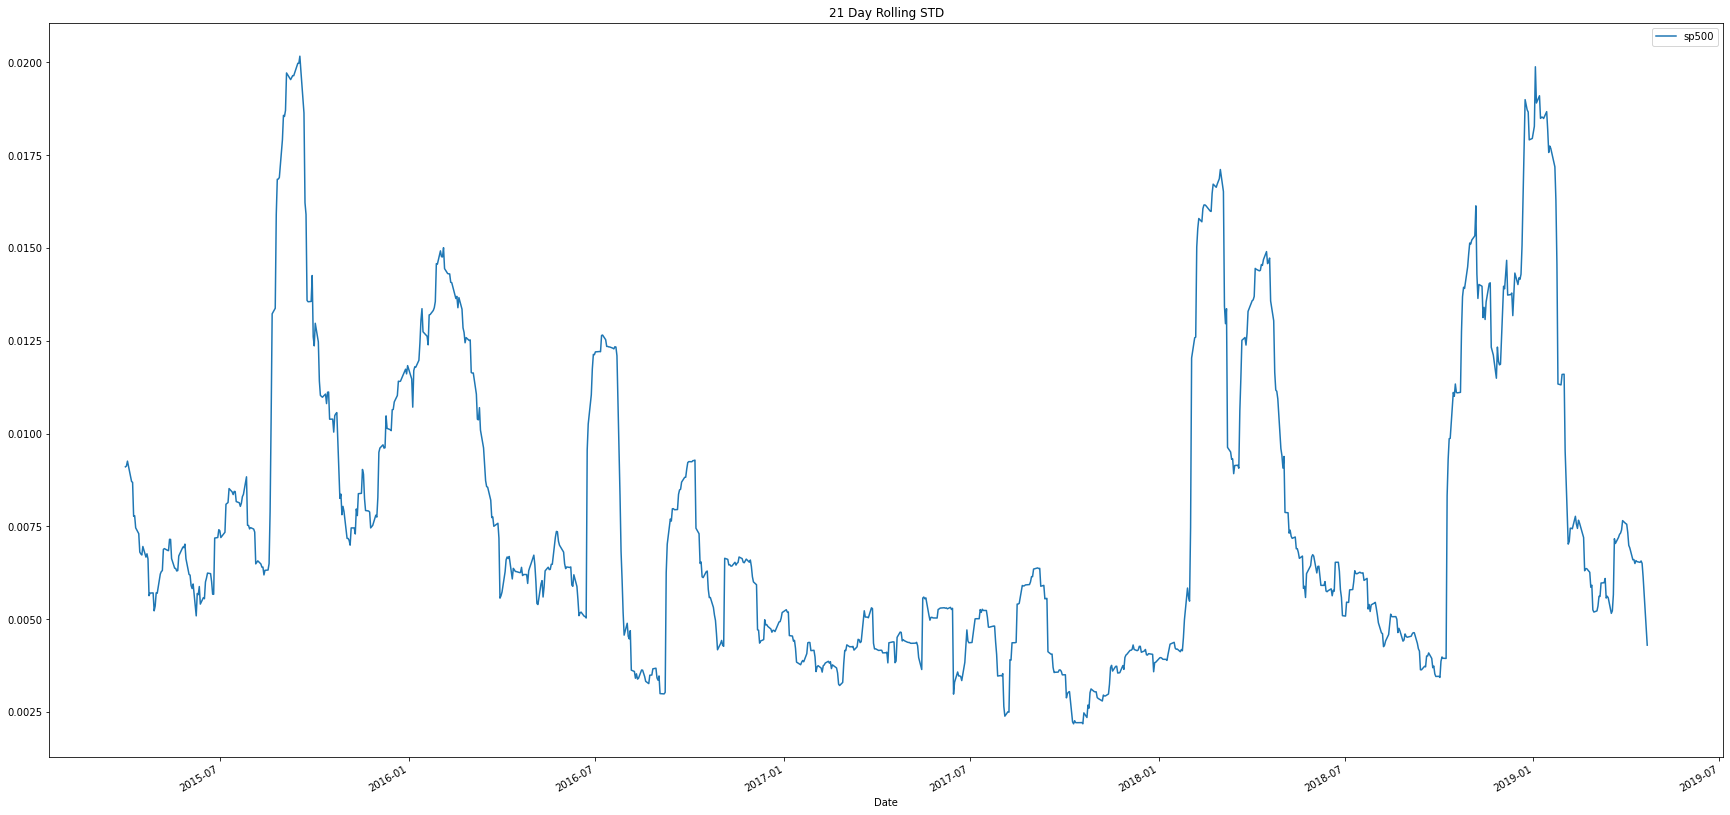

In [93]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
sp500_rolling_21 = df_daily[["sp500"]].rolling(window = 21).std()
sp500_rolling_21.plot(figsize=(30,15), title = "21 Day Rolling STD")

In [94]:
# Construct a correlation table
df_daily_corr = df_daily.corr()
df_daily_corr.style.background_gradient(cmap ="viridis")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
sp500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


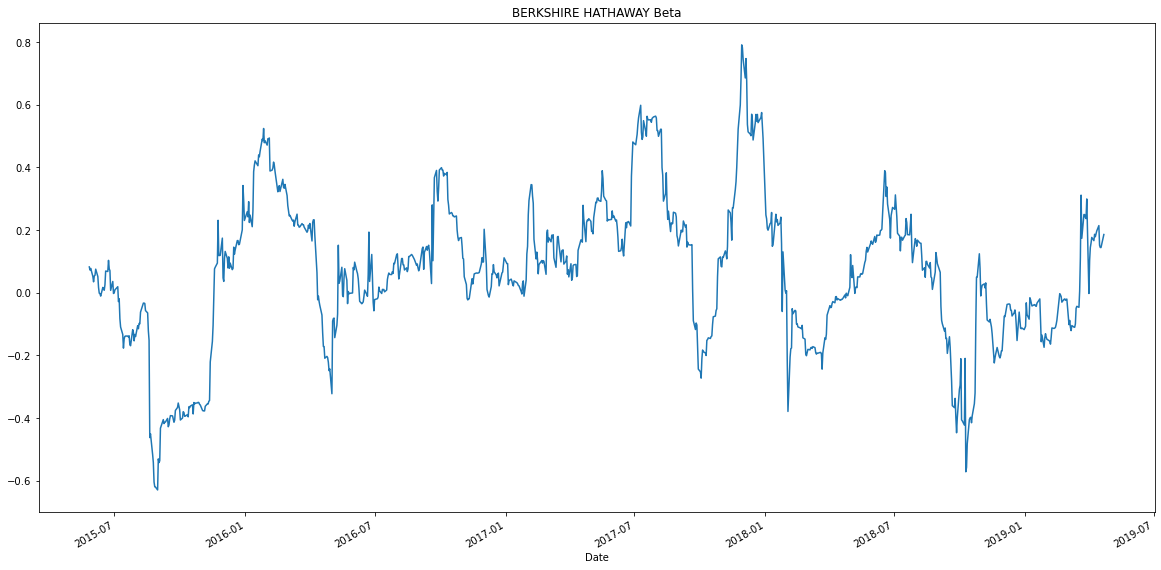

In [95]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
covariance_Soros = df_daily['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(df_daily['sp500'])
variance = df_daily['sp500'].rolling(60).var()
result = covariance_Soros / variance
result.plot(figsize = (20,10), title = "BERKSHIRE HATHAWAY Beta" )


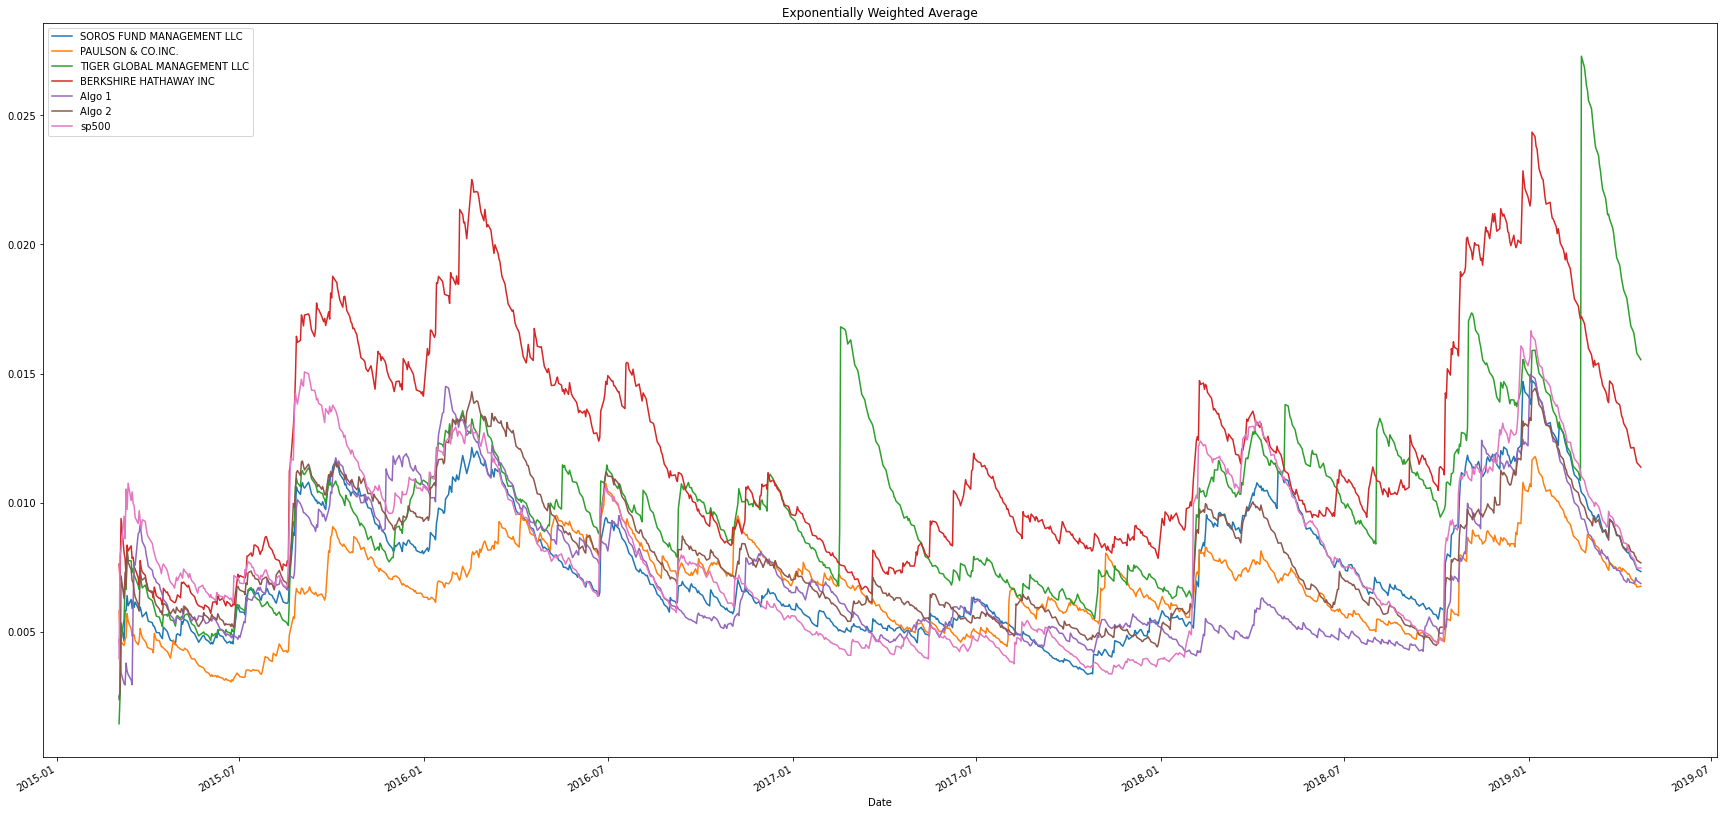

In [96]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
df_daily.ewm(halflife=21).std().plot(figsize=(30,15), title = "Exponentially Weighted Average")

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [97]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (df_daily.mean()*252) / (df_daily.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
sp500                         -0.518582
dtype: float64

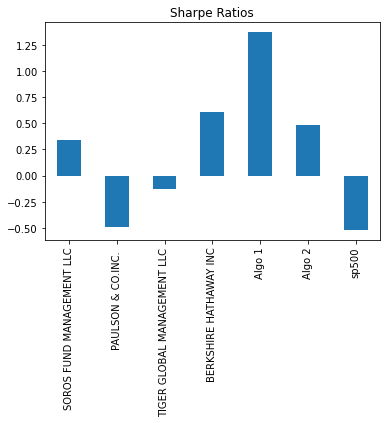

In [98]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar", title = "Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [99]:
# Read the first stock
Acorns_stock_csv = Path("Resources/Acorns_stock.csv")
Acorns_stock = pd.read_csv(Acorns_stock_csv, index_col="Date",infer_datetime_format= True, parse_dates = True)
Acorns_stock.rename(columns = {"Close":"ATV"}, inplace = True)
Acorns_stock.head()

,ATV
Date,
2015-01-02 16:00:00,10.33
2015-01-05 16:00:00,10.60
2015-01-07 16:00:00,10.13
2015-01-08 16:00:00,9.93
2015-01-09 16:00:00,9.73


In [100]:
# Read the second stock
Fiserv_stock_csv = Path("Resources/Fiserv_stock.csv")
Fiserv_stock = pd.read_csv(Fiserv_stock_csv, index_col="Date",infer_datetime_format= True, parse_dates = True)
Fiserv_stock.rename(columns = {"Close":"FISV"}, inplace = True)
Fiserv_stock.head()

,FISV
Date,
2015-01-02 16:00:00,35.31
2015-01-05 16:00:00,34.91
2015-01-06 16:00:00,34.95
2015-01-07 16:00:00,35.42
2015-01-08 16:00:00,36.14


In [101]:
# Read the third stock
Squar_stock_csv = Path("Resources/Squar_stock.csv")
Squar_stock = pd.read_csv(Squar_stock_csv, index_col="Date",parse_dates = True, infer_datetime_format= True )
Squar_stock.rename(columns = {"Close":"SQ"}, inplace = True)
Squar_stock.head()

,SQ
Date,
2015-11-19 16:00:00,13.07
2015-11-20 16:00:00,12.85
2015-11-23 16:00:00,12.12
2015-11-24 16:00:00,12.02
2015-11-25 16:00:00,11.90


In [102]:
# Concatenate all stocks into a single DataFrame
all_stocks = pd.concat([Acorns_stock,Fiserv_stock,Squar_stock], axis ="columns" , join= "inner")
all_stocks.sort_index(ascending = True, inplace = True)
all_stocks.head()

,ATV,FISV,SQ
Date,,,
2015-11-19 16:00:00,3.80,48.33,13.07
2015-11-20 16:00:00,3.47,48.40,12.85
2015-11-23 16:00:00,3.19,48.13,12.12
2015-11-24 16:00:00,3.20,47.62,12.02
2015-11-25 16:00:00,3.40,47.71,11.90


In [103]:
# Reset the index
all_stocks = all_stocks.reset_index()

In [104]:
# Pivot so that each column of prices represents a unique symbol
final_portfolio = all_stocks.pivot_table( index = "Date")
final_portfolio

,ATV,FISV,SQ
Date,,,
2015-11-19 16:00:00,3.80,48.33,13.07
2015-11-20 16:00:00,3.47,48.40,12.85
2015-11-23 16:00:00,3.19,48.13,12.12
2015-11-24 16:00:00,3.20,47.62,12.02
2015-11-25 16:00:00,3.40,47.71,11.90
...,...,...,...
2020-10-02 16:00:00,14.75,101.65,169.61
2020-10-05 16:00:00,14.94,100.82,180.92
2020-10-06 16:00:00,14.95,102.36,175.34


In [105]:
# Drop Nulls
final_portfolio.dropna(inplace=True)
final_portfolio.head()

,ATV,FISV,SQ
Date,,,
2015-11-19 16:00:00,3.80,48.33,13.07
2015-11-20 16:00:00,3.47,48.40,12.85
2015-11-23 16:00:00,3.19,48.13,12.12
2015-11-24 16:00:00,3.20,47.62,12.02
2015-11-25 16:00:00,3.40,47.71,11.90


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [106]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
my_portfolio = all_stocks.dot(weights)
my_portfolio_returns = my_portfolio.pct_change()
my_portfolio_returns.dropna(inplace=True)
my_portfolio_returns.head()

ValueError: Dot product shape mismatch, (1207, 4) vs (3,)

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
portfolio_returns = pd.concat((my_portfolio_returns,df_daily), axis = "column", join = "inner")
portfolio_returns.rename(columns = {0:"my_portfolio"}, inplace = True)
portfolio_returns

In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
#portfolio_returns.dropna(inplace=True)
#portfolio_returns

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [ ]:
# Risk
# YOUR CODE HERE
#protfolio_std = pd.DataFrame(portfolio_returns.std()).rename(columns = {0:"std"})
#protfolio_std

In [ ]:
# Rolling
# YOUR CODE HERE
my_portfolio_rolling_15 = portfolio_returns[["my_portfolio"]].rolling(window = 15).std()
my_portfolio_rolling_60 = portfolio_returns[["my_portfolio"]].rolling(window = 60).std()
my_portfolio_rolling_120 = portfolio_returns[["my_portfolio"]].rolling(window = 120).std()
ax = my_portfolio_rolling_15.plot(figsize = (20,10), title = 'My Portfolio STD')
my_portfolio_rolling_60.plot(ax = ax)
my_portfolio_rolling_120.plot(ax = ax)
ax.legend(['rolling_15','rolling_60','rolling_120'])

In [ ]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
trading_days = portfolio_returns.count()
sharpe_ratios = portfolio_returns.mean()*trading_days/(portfolio_returns.std()*np.sqrt(trading_days))

In [ ]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind = 'bar', title = "sharpe ratios")

In [ ]:
# Create a correlation analysis
# YOUR CODE HERE

In [ ]:
# Beta
# YOUR CODE HERE
rolling_covariance = portfolio_returns['my_portfolio'].rolling(window=60).cov(portfolio_returns['sp500'])
rolling_variance = portfolio_returns['sp500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of my portfolio')